In [1]:
import IPython.display
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque
from IPython.display import HTML
import sympy
import math

## 台車倒立振子モデル(非線形詳細版)

In [2]:
sympy.init_printing()

g = sympy.Symbol('g')
m_c = sympy.Symbol('m_c')
m_p = sympy.Symbol('m_p')
l_p = sympy.Symbol('l_p')
J_p = sympy.Symbol('J_p')
mu_c = sympy.Symbol('mu_c')
mu_p = sympy.Symbol('mu_p')
f_c = sympy.Symbol('f_c')
theta = sympy.Symbol('theta')
dot_theta = sympy.Symbol('dot_theta')
ddot_theta = sympy.Symbol('ddot_theta')
z = sympy.Symbol('z')
dot_z = sympy.Symbol('dot_z')
ddot_z = sympy.Symbol('ddot_z')

expr_3_6_left = ( m_c + m_p ) * ddot_z + m_p * l_p * sympy.cos( theta ) * ddot_theta
expr_3_6_right = - mu_c * dot_z + m_p * l_p * dot_theta **2 * sympy.sin( theta ) + f_c
expr_3_6_lr = expr_3_6_left - expr_3_6_right
expr_3_7_left = m_p * l_p * sympy.cos( theta ) * ddot_z + ( J_p + m_p * l_p **2 ) * ddot_theta
expr_3_7_right = - mu_p * dot_theta + m_p * g * l_p * sympy.sin( theta )
expr_3_7_lr = expr_3_7_left - expr_3_7_right

ans = sympy.solve( [ expr_3_6_lr, expr_3_7_lr ], [ ddot_z, ddot_theta ] )

ans_ddot_z = sympy.simplify(ans[ddot_z])
ans_ddot_theta = sympy.simplify(ans[ddot_theta])
print( 'ddot_z =',ans_ddot_z )
print( 'ddot_theta =',ans_ddot_theta )
print()
print( '(latex) ddot_z =',sympy.latex(ans_ddot_z) )
print( '(latex) ddot_theta =',sympy.latex(ans_ddot_theta) )

ddot_z = (J_p*dot_theta**2*l_p*m_p*sin(theta) - J_p*dot_z*mu_c + J_p*f_c + dot_theta**2*l_p**3*m_p**2*sin(theta) + dot_theta*l_p*m_p*mu_p*cos(theta) - dot_z*l_p**2*m_p*mu_c + f_c*l_p**2*m_p - g*l_p**2*m_p**2*sin(2*theta)/2)/(J_p*m_c + J_p*m_p + l_p**2*m_c*m_p + l_p**2*m_p**2*sin(theta)**2)
ddot_theta = (-dot_theta**2*l_p**2*m_p**2*sin(2*theta)/2 - dot_theta*m_c*mu_p - dot_theta*m_p*mu_p + dot_z*l_p*m_p*mu_c*cos(theta) - f_c*l_p*m_p*cos(theta) + g*l_p*m_c*m_p*sin(theta) + g*l_p*m_p**2*sin(theta))/(J_p*m_c + J_p*m_p + l_p**2*m_c*m_p + l_p**2*m_p**2*sin(theta)**2)

(latex) ddot_z = \frac{J_{p} dot_{\theta}^{2} l_{p} m_{p} \sin{\left(\theta \right)} - J_{p} dot_{z} \mu_{c} + J_{p} f_{c} + dot_{\theta}^{2} l_{p}^{3} m_{p}^{2} \sin{\left(\theta \right)} + dot_{\theta} l_{p} m_{p} \mu_{p} \cos{\left(\theta \right)} - dot_{z} l_{p}^{2} m_{p} \mu_{c} + f_{c} l_{p}^{2} m_{p} - \frac{g l_{p}^{2} m_{p}^{2} \sin{\left(2 \theta \right)}}{2}}{J_{p} m_{c} + J_{p} m_{p} + l_{p}^{2} m_{c} m_{p} + l_{p}^

$$
\ddot{z}=
\frac{J_{p} \dot{\theta}^{2} l_{p} m_{p} \sin{\left(\theta \right)} - J_{p} \dot{z} \mu_{c} + J_{p} f_{c} + \dot{\theta}^{2} l_{p}^{3} m_{p}^{2} \sin{\left(\theta \right)} + \dot{\theta} l_{p} m_{p} \mu_{p} \cos{\left(\theta \right)} - \dot{z} l_{p}^{2} m_{p} \mu_{c} + f_{c} l_{p}^{2} m_{p} - \frac{g l_{p}^{2} m_{p}^{2} \sin{\left(2 \theta \right)}}{2}}{J_{p} m_{c} + J_{p} m_{p} + l_{p}^{2} m_{c} m_{p} + l_{p}^{2} m_{p}^{2} \sin^{2}{\left(\theta \right)}}
$$
$$
\ddot{\theta}=
\frac{- \frac{\dot{\theta}^{2} l_{p}^{2} m_{p}^{2} \sin{\left(2 \theta \right)}}{2} - \dot{\theta} m_{c} \mu_{p} - \dot{\theta} m_{p} \mu_{p} + \dot{z} l_{p} m_{p} \mu_{c} \cos{\left(\theta \right)} - f_{c} l_{p} m_{p} \cos{\left(\theta \right)} + g l_{p} m_{c} m_{p} \sin{\left(\theta \right)} + g l_{p} m_{p}^{2} \sin{\left(\theta \right)}}{J_{p} m_{c} + J_{p} m_{p} + l_{p}^{2} m_{c} m_{p} + l_{p}^{2} m_{p}^{2} \sin^{2}{\left(\theta \right)}}
$$

## 台車倒立振子モデル(非線形簡略版)

In [3]:
a_c = sympy.Symbol('a_c')
b_c = sympy.Symbol('b_c')
v = sympy.Symbol('v')

expr_3_22_up_left = ddot_z
expr_3_22_up_right = -a_c * dot_z + b_c * v
expr_3_22_up_lr = expr_3_22_up_left - expr_3_22_up_right

expr_3_22_down_left = m_p * l_p * sympy.cos( theta ) * ddot_z + ( J_p + m_p * l_p**2 ) * ddot_theta
expr_3_22_down_right = - mu_p * dot_theta + m_p * g * l_p * sympy.sin( theta )
expr_3_22_down_lr = expr_3_22_down_left - expr_3_22_down_right

ans = sympy.solve( [ expr_3_22_up_lr, expr_3_22_down_lr ], [ ddot_z, ddot_theta ] )
ans_ddot_z = sympy.simplify(ans[ddot_z])
ans_ddot_theta = sympy.simplify(ans[ddot_theta])

print( 'ddot_z =',ans_ddot_z )
print( 'ddot_theta =',ans_ddot_theta )
print()
print( '(latex) ddot_z =',sympy.latex(ans_ddot_z) )
print( '(latex) ddot_theta =',sympy.latex(ans_ddot_theta) )

ddot_z = -a_c*dot_z + b_c*v
ddot_theta = (a_c*dot_z*l_p*m_p*cos(theta) - b_c*l_p*m_p*v*cos(theta) - dot_theta*mu_p + g*l_p*m_p*sin(theta))/(J_p + l_p**2*m_p)

(latex) ddot_z = - a_{c} dot_{z} + b_{c} v
(latex) ddot_theta = \frac{a_{c} dot_{z} l_{p} m_{p} \cos{\left(\theta \right)} - b_{c} l_{p} m_{p} v \cos{\left(\theta \right)} - dot_{\theta} \mu_{p} + g l_{p} m_{p} \sin{\left(\theta \right)}}{J_{p} + l_{p}^{2} m_{p}}


$$
\begin{eqnarray}
\ddot{z} &=& - a_{c} \dot{z} + b_{c} v \\
\ddot{\theta} &=&
\frac{a_{c} \dot{z} l_{p} m_{p} \cos{\left(\theta \right)} - b_{c} l_{p} m_{p} v \cos{\left(\theta \right)} - \dot{\theta} \mu_{p} + g l_{p} m_{p} \sin{\left(\theta \right)}}{J_{p} + l_{p}^{2} m_{p}}
\end{eqnarray}
$$

## 台車倒立振子モデル(非線形簡略版)のシミュレーション

状態$x$を
$$
x =
\left[
\begin{array}{c}
\theta \\
\dot{ \theta } \\
z \\
\dot{ z }
\end{array}
\right]
$$
とおく。

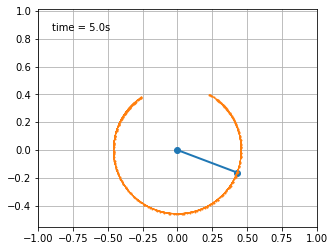

In [25]:
g = 9.81 * 1e0
m_p = 1.07 * 1e-1
l_p = 2.30 * 1e-1
a_c = 6.25 * 1e0
b_c = 4.36 * 1e0
J_p = 1.84 * 1e-3
mu_p = 2.56 * 1e-4

L_p = 2 * l_p

t_stop = 5  # how many seconds to simulate
history_len = 500  # how many trajectory points to display

def state_eq(x, t):

    dot_x = np.zeros_like(x)
    
    theta = x[0]
    dot_theta = x[1]
    z = x[2]
    dot_z = x[3]
    
    # FBなど、入力電圧計算
    v = 0
    
    # 状態更新
    ddot_z = -a_c*dot_z + b_c*v
    ddot_theta = (a_c*dot_z*l_p*m_p*cos(theta) - b_c*l_p*m_p*v*cos(theta) - dot_theta*mu_p + g*l_p*m_p*sin(theta))/(J_p + l_p**2*m_p)
    
    dot_x = [ dot_theta, ddot_theta, dot_z, ddot_z ]

    return dot_x

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.02
t = np.arange(0, t_stop, dt)

# 初期状態の設定
theta_0 = np.radians(30)
dot_theta_0 = np.radians(0)
z_0 = 0
dot_z_0 = 0
x_0 = [theta_0, dot_theta_0, z_0, dot_z_0]

# integrate your ODE using scipy.integrate.
x = integrate.odeint(state_eq, x_0, t)

theta = x[:,0]
dot_theta = x[:,1]
z = x[:,2]
dot_z = x[:,3]

x_p = z + L_p * sin( theta )
y_p = L_p * cos( theta )

x_c = z
y_c = 0

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-1, 1), ylim=(-L_p*1.2, L_p*2.2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [x_c[i], x_p[i]]
    thisy = [y_c, y_p[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[1])
    history_y.appendleft(thisy[1])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(x), interval=dt*1000, blit=True)
HTML( ani.to_jshtml() )

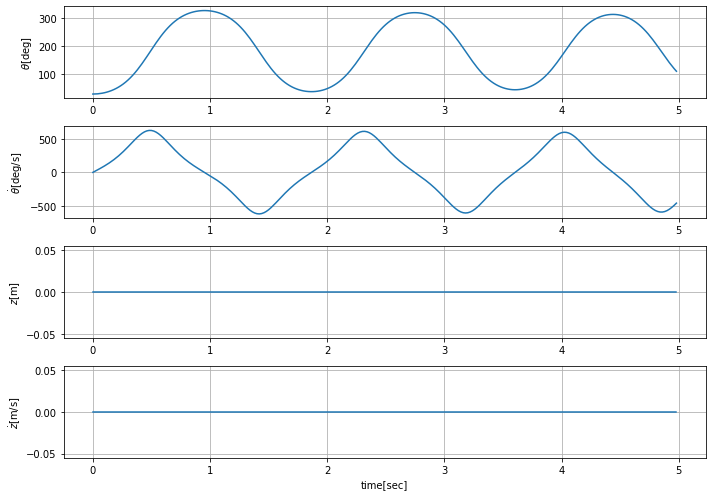

In [48]:
fig_t_theta, axes = plt.subplots(4, 1, tight_layout=True, figsize=(10, 7))

axes[0].plot(t,np.degrees(theta))
axes[0].set_ylabel(r"$\theta$[deg]")
axes[0].grid()
axes[1].plot(t,np.degrees(dot_theta))
axes[1].set_ylabel(r"$\dot{ \theta }$[deg/s]")
axes[1].grid()
axes[2].plot(t,z)
axes[2].set_ylabel(r"$z$[m]")
axes[2].grid()
axes[3].plot(t,dot_z)
axes[3].set_ylabel(r"$\dot{z}$[m/s]")
axes[3].grid()

axes[-1].set_xlabel(r"time[sec]")
plt.show()

## 参考

* [川田昌克（編著）・東　俊一・市原裕之・浦久保孝光・大塚敏之・甲斐健也・國松禎明・澤田賢治・永原正章・南　裕樹：倒立振子で学ぶ制御工学, 森北出版](https://www.maizuru-ct.ac.jp/control/kawata/study/book_ip/book_ip_page.html)
